### Simple Regression


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
#reference: http://www.statsmodels.org/


%matplotlib inline
sns.set_style('white')
# plt.style.use('seaborn-white')

In [48]:
#download at http://www-bcf.usc.edu/~gareth/ISL/data.html
#read in data (change to what ever folder you use)

advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [49]:
advertising.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


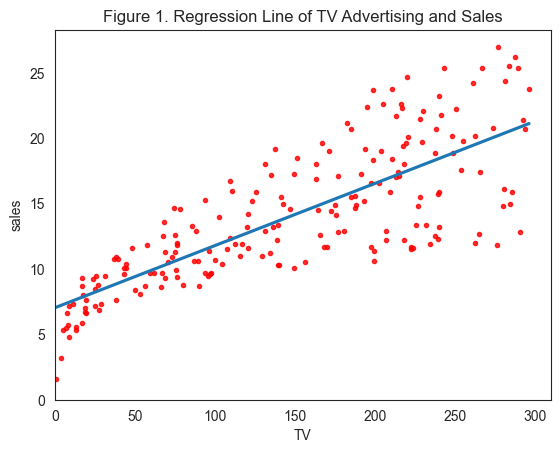

In [50]:
#we can display the regression line using seaborn
sns.regplot(x=advertising.TV, y=advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.title('Figure 1. Regression Line of TV Advertising and Sales')
plt.xlim(0,310)
plt.ylim(ymin=0);

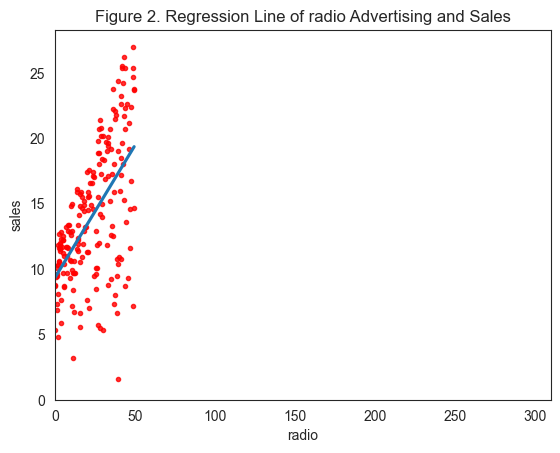

In [51]:
#we can display the regression line using seaborn
sns.regplot(x=advertising.radio, y=advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.title('Figure 2. Regression Line of radio Advertising and Sales')
plt.xlim(0,310)
plt.ylim(ymin=0);

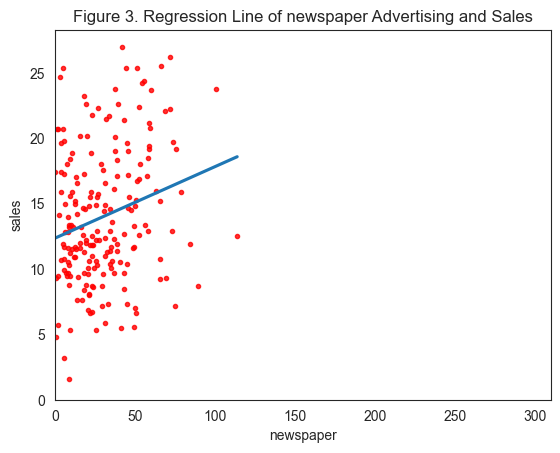

In [52]:
#we can display the regression line using seaborn
sns.regplot(x=advertising.newspaper, y=advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.title('Figure 3. Regression Line of newspaper Advertising and Sales')
plt.xlim(0,310)
plt.ylim(ymin=0);

There are multiple ways to do linear regression in Python. Above we have used to seaborn to just draw the regression line. We can also use Scikit-Learn or the statsmodels library. First we use the sklearn module. The intercept is $\beta_0$ and the coefficent is $\beta_1$


In [53]:
# Regression coefficients (Ordinary Least Squares)
lm = skl_lm.LinearRegression()

X = advertising.TV
X= np.array(X).reshape(-1,1)
Y = advertising.sales

lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)
#X

7.032593549127695
[0.04753664]


## Question: 

1. What is the predictor and the response in the code above?
    **Answer**
    - **Predictor**: TV
    - **Response**: Sales

In [54]:
#use statsmodel for linear regression
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


## Question:
1. Perform the same simple regression on `radio` and `newspaper` (using statsmodels)

In [55]:
#use statsmodel for linear regression
est = smf.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [56]:
#use statsmodel for linear regression
est = smf.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Question
2. Explain the t-statistic significance
    **Answer**:
    - **Radio**: 
      - **High t-Statistic and Low p-Value**: Both the intercept and the radio predictor have high t-statistics and very low p-values (0.000), indicating that they are **statistically significant**.
      - **Significance**: Since the p-values for both the intercept and the radio predictor are less than 0.05, we reject the null hypothesis that their coefficients are zero. This indicates that both the intercept and the `radio` predictor are **statistically significant** and have a meaningful impact on the response variable (`sales`).
    
    - **TV**:
      - **High t-Statistic and Low p-Value**: Both the intercept and the TV predictor have high t-statistics and very low p-values (0.000), indicating that they are **statistically significant**.
      - **Significance**: Since the p-values for both the intercept and the TV predictor are less than 0.05, we reject the null hypothesis that their coefficients are zero. This indicates that both the intercept and the `TV` predictor are **statistically significant** and have a meaningful impact on the response variable (`sales`).
    
    - **Newspaper**:
      - **High t-Statistic and Low p-Value**: Both the intercept and the newspaper predictor have high t-statistics and very low p-values (0.000 for the intercept and 0.001 for newspaper), indicating that they are **statistically significant**.
      - **Significance**: Since the p-values for both the intercept and the newspaper predictor are less than 0.05, we reject the null hypothesis that their coefficients are zero. This indicates that both the intercept and the `newspaper` predictor are **statistically significant** and have a meaningful impact on the response variable (`sales`).
    
    **Summary**
    Based on the single linear regression results for `TV`, `newspaper`, and `radio`, all three predictors are statistically significant.
    
    However, if we compare the three, `TV` is the most highly significant predictor, while `newspaper` is the least significant among the three based on the t-statistic.

### Multiple Regression

Perform multiple regression on TV, radio and newspaper, use:
```
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()
```
Also print the correlation:
```
advertising.corr()
```

In [57]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        17:24:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Question:
1. Which predictor(s) has significant association with sales? Which does not?
    
    **Answer**:
      
      **Based on t-statistics**:
      - **TV**:
        - **t-Statistic**: 32.809
        - **p-Value**: 0.000
        - **Significance**: The p-value for TV is 0.000, which is less than 0.05. This indicates that the `TV` predictor is `statistically significant` and has a meaningful impact on sales.
      - **Radio**:
        - t-Statistic: 21.893
        - p-Value: 0.000
        - **Significance**: The p-value for radio is 0.000, which is less than 0.05. This indicates that the `radio` predictor is `statistically significant` and has a meaningful impact on sales.
      - **NewsPaper**:
        - t-Statistic: -0.177
        - p-Value: 0.860
        - Significance: `Newspaper` has a **low t-statistic** and a **high p-value (0.860)**, indicating that it is `not statistically significant` and does not have a meaningful impact on sales.

    
2. Did you have a different answer when performing individual simple regression on each predictor( radio, TV and newspaper separately). Explain the results.
  
    **Answer**:
      
      **Explanation of Differences**:
        
      - **Collinearity**: In multiple regression, the presence of other predictors can reveal collinearity, affecting the significance of each predictor.
      - **Shared Variance**: Multiple regression accounts for shared variance among predictors, leading to different coefficient estimates.
      - **Model Complexity**: Multiple regression includes multiple predictors, providing a more comprehensive model.

      **Correlation Interpretation**:
         
      - **TV and Sales**: High positive correlation (0.782224), indicating a strong relationship.
      - **Radio and Sales**: Moderate positive correlation (0.576223), indicating a moderate relationship.
      - **Newspaper and Sales**: Low positive correlation (0.228299), indicating a weak relationship.

      **Summary**
        
      - **Significant** Predictors in Multiple Regression: TV and radio remain significant.
      - **Non-Significant Predictor in Multiple Regression**: newspaper is not significant in multiple regression, despite being significant in individual regression, due to its correlation with other predictors.

In [59]:
X_TV = advertising["TV"]
y = advertising["sales"]

X_TV = sm.add_constant(X_TV)
model_TV = sm.OLS(y, X_TV).fit()
r_squared_TV = model_TV.rsquared
print("R^2 value for TV alone:", r_squared_TV)

R^2 value for TV alone: 0.611875050850071


In [60]:
X_TV_radio = advertising[["TV", "radio"]]
X_TV_radio = sm.add_constant(X_TV_radio)
y = advertising["sales"]

model_TV_radio = sm.OLS(y, X_TV_radio).fit()
r_squared_TV_radio = model_TV_radio.rsquared
print("R^2 value for TV and radio:", r_squared_TV_radio)

R^2 value for TV and radio: 0.8971942610828956


3. What is th $R^2$ value for TV alone, and TV and radio (please read pg 79-80 ISLR book). Comment of the $R^2$ value obtained.
    
    **Answer**:
    
    - **Single regression**: Based on the result above, `61.2%` of the variance in `sales` is influenced by TV.
    - **Multiple regression (TV & radio)**: Based on the result above, `89.7%` of the variance in `sales` is influenced by TV and radio.
    
    **Summary**:
    
    The \( R^2 \) score of `TV & radio` > `TV alone`, indicating that the combination of TV and radio advertisements results in a better sales rate compared to TV alone.

## Extensions to Linear Model -Interaction Model

The standard linear model makes two important assumptions. They state that the relationship between the predictors and response are additive and linear. The additive assumption means that the effect of changes in a predictor $X_j$ on the response Y is independent of the values of the other predictors. The linear assumption states that the change in the response Y due to a one-unit change in $X_j$ is constant, regardless of the value of $X_j$. 

We may need to consider interaction effect between predictors, that is, predictors are not independent but depend on each other. For example, given a fixed budget of \$100,000, spending half on radio and half on TV may increase sales more than allocating the entire amount to either TV or to radio. 

In the standard linear model, an increase in $X_1$ will increase by an average of $\beta_1$ units. Notice that the presence of $X_2$ does not alter this statement—that is, regardless of the value of $X_2$, a one-unit increase in $X_1$ will lead to a $\beta_1$-unit increase in Y.

$$ Y=\beta_0+\beta_1X_1+\beta_2X_2 + \epsilon $$


One way of extending this model to allow for interaction effects is to include a third predictor, called an interaction term, which is constructed by computing the product of $X_1$ and $X_2$. This results in the model:


$$ Y=\beta_0+\beta_1X_1+\beta_2 X_2+\beta_3 X_1 X_2+\epsilon $$
   


We test this using the following code (fill in with actual variables):

```
est = smf.ols('Response ~ X1 + X2 + X1*X2', advertising).fit()
est.summary().tables[1]
```


In [61]:
TV = advertising["TV"]
radio = advertising["radio"]
sales = advertising["sales"]

est = smf.ols('sales ~ TV + radio + TV*radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [62]:
r_squared = est.rsquared
print("R^2 value:", r_squared)

R^2 value: 0.9677905498482523



### Questions:
1. Obtain the linear model with TV, radio and interaction term TV*radio. Which predictors are significant? Which predictors should be used in the model? What is the $R^2$ value?

    **Answer**:
    
    Based on the t-stats, `TV (t-stats = 12.7)` is more significant compared to `radio (t-stats = 3.241)`. However, the combination of `TV & radio (t-stats = 20.73)` gives higher significance compared to `TV` alone.
    
    Hence, it is suggested to combine the `TV & radio` predictors to increase the sales rate. This conclusion is also supported by a high `R^2 value = 0.967`.

### Non-linear data : Polynomial Regression

Read in the auto.csv file included in the zipped download.

Plot out the data using (1) linear line (2) polynomial degree 2 (3) polynomail degree 5

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


(40.0, 240.0)

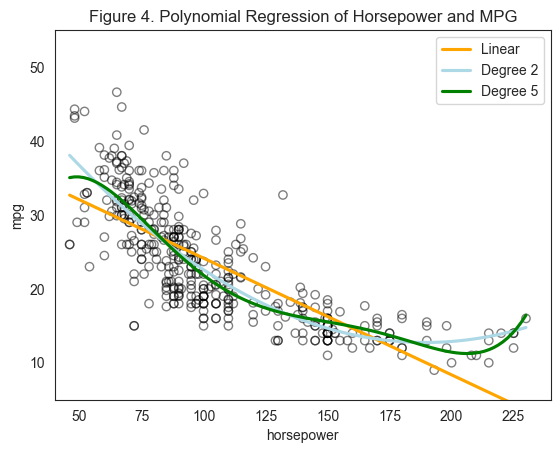

In [63]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()  # drop NA values
auto.info()

plt.scatter(x=auto.horsepower, y=auto.mpg,
            facecolors='None', edgecolors='k', alpha=.5)
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None,
            label='Linear', scatter=False, color='orange')
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None,
            label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None,
            label='Degree 5', order=5, scatter=False, color='g')
plt.title('Figure 4. Polynomial Regression of Horsepower and MPG')
plt.legend()
plt.ylim(5, 55)
plt.xlim(40, 240)

### Question
Which line fits best? There is a pronounced relationship between mpg and horsepower, but it seems clear that this relationship is in fact non-linear: the data suggest a curved relationship.

**Answer**:

From the figure above, the Degree 5 (green line) model fits the data better compared to the Linear and Degree 2 models. This is because the higher degree polynomial can capture the non-linear relationship more effectively.

The linear regression model assumes a linear relationship between the response and predictors. But in some cases, the true relationship between the response and the predictors may be nonlinear. We can directly extend the linear model to accommodate non-linear relationships by using polynomial regression.

We can transform the model (which still remains a linear model in X): 

$$  mpg=\beta_0+\beta_1 \times horsepower + \beta_2 \times horsepower^2 $$

We can still use standard linear regression software to estimate $\beta_0$, $\beta_1$, and $\beta_2$ in order to produce a non-linear fit.

To do so make another column to store the $horsepower^2$ values (quadratic):
```
auto['horsepower2'] = auto.horsepower**2
auto.head(3)
```
Then run the statsmodels ols module as before to compare the linear and quadratic fit.

In [64]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

# Linear fit
linear_model = smf.ols('mpg ~ horsepower', data=auto).fit()
print("Linear model summary:")
print(linear_model.summary())

# Quadratic fit
quadratic_model = smf.ols('mpg ~ horsepower + horsepower2', data=auto).fit()
print("\nQuadratic model summary:")
print(quadratic_model.summary())

Linear model summary:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           7.03e-81
Time:                        17:24:52   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.7

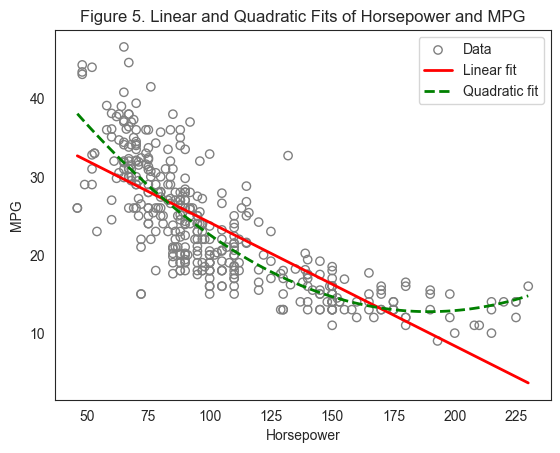

In [65]:

# Plot the data and the linear and quadratic fits
plt.scatter(auto['horsepower'], auto['mpg'], label='Data', color='gray', facecolors='None')

# Linear fit line
hp_range = np.linspace(auto['horsepower'].min(), auto['horsepower'].max(), 100)
linear_fit = linear_model.params['Intercept'] + linear_model.params['horsepower'] * hp_range
plt.plot(hp_range, linear_fit, label='Linear fit', color='red', linewidth=2)

# Quadratic fit line
quadratic_fit = (quadratic_model.params['Intercept'] +
                 quadratic_model.params['horsepower'] * hp_range +
                 quadratic_model.params['horsepower2'] * hp_range ** 2)

plt.plot(hp_range, quadratic_fit, label='Quadratic fit', color='green', linestyle='--', linewidth=2)

plt.title('Figure 5. Linear and Quadratic Fits of Horsepower and MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()


### Question:
1. Which model is better linear or quadratic (or higher degree)? How do you make the judgement?

**Answer**:

- R-squared Comparison: The quadratic model has a higher ( R^2 ) value (0.677) compared to the linear model (0.606), indicating that the `quadratic model` explains **more variance** in mpg.
- Model Fit: The `quadratic model` has a **lower AIC (2276)** compared to the linear model (2361), suggesting **a better fit**.
- Conclusion: The `quadratic model` is **better** as it provides a **higher ( R^2 ) value** and a **better fit** to the data compared to the linear model.

Figure 5. Quadratic model shows better fit compared to linear model.
